In [1]:
import re
import os
import codecs
import pandas
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from random import randint

In [2]:
# input
IN_PATH = 'embeddings/slac.emb'
CSV_PATH = 'embeddings/slac.csv'

# output
IMG_PATH = './img-slac'
DATASET_PATH = './dataset-slac'

In [3]:
itl = pandas.read_csv(CSV_PATH)
itl.head()

,id,filename,genre,subgenre,artist,title
0,Blues_-_Modern-Albert_King_-_Born_Under_A_Bad_...,/Users/pasquale/git/midi2vec/SLAC_MIDI_Dataset...,Blues,Modern,Albert King,Born Under A Bad Sign
1,Blues_-_Modern-B_B_King_-_How_Blue_Can_You_Get,/Users/pasquale/git/midi2vec/SLAC_MIDI_Dataset...,Blues,Modern,B B King,How Blue Can You Get
2,Blues_-_Modern-B_B_King_-_Rock_Me_Baby,/Users/pasquale/git/midi2vec/SLAC_MIDI_Dataset...,Blues,Modern,B B King,Rock Me Baby
3,Blues_-_Modern-B_B_King_-_The_Thrill_Is_Gone,/Users/pasquale/git/midi2vec/SLAC_MIDI_Dataset...,Blues,Modern,B B King,The Thrill Is Gone
4,Blues_-_Modern-Buddy_Guy_-_Don't_Answer_the_Door,/Users/pasquale/git/midi2vec/SLAC_MIDI_Dataset...,Blues,Modern,Buddy Guy,Don't Answer the Door


In [4]:
ids = itl['id'].values

midi_embedding = KeyedVectors.load_word2vec_format(IN_PATH)
uris = list(filter(lambda x: x in ids, midi_embedding.index2entity))

vectors = [midi_embedding.get_vector(k) for k in uris]

In [5]:
# function that returns a property given the id
def extract(what, x):
    return itl[itl['id']==x][what].values[0]

Plot a 2D map of the dataset.

In [6]:
def randcolor():
    return '#{:06x}'.format(randint(0, 256**3))

def plot(what='genre', map_color=False):
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(vectors)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.scatter(x_coords, y_coords, alpha=0)
    plt.rcParams.update({'font.size': 1})

    curlabels = list(map(lambda x: extract(what, x), uris))

    _unique_labels = list(set(curlabels))
    _colors = list(map(lambda x: randcolor(), _unique_labels))
    
    for i, value in enumerate(zip(curlabels, uris, x_coords, y_coords)):
        label, uri, x, y = value

        c = _colors[_unique_labels.index(label)]
        plt.text(x, y, label, color=c)

    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)

    if not os.path.exists(IMG_PATH):
        os.makedirs(IMG_PATH)

    out = '%s/%s.eps' % (IMG_PATH, what)
    plt.savefig(out, format='eps', dpi=2400)
    print('Picture saved at %s' % out)

Picture saved at ./img-slac/artist.eps


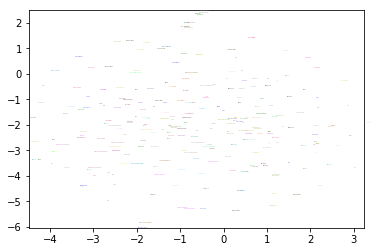

In [7]:
plot(what='artist', map_color=True)

Picture saved at ./img-slac/genre.eps


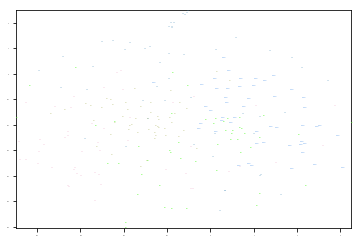

In [8]:
plot(what='genre')

Picture saved at ./img-slac/subgenre.eps


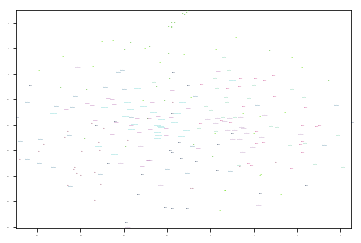

In [9]:
plot(what='subgenre')

Clean the data for Tensorflow

In [10]:
def vec_to_string(vector):
    return ' '.join([str(v) for v in vector])

In [11]:
if not os.path.exists(DATASET_PATH):
    os.mkdir(DATASET_PATH)

with open('%s/id.txt' % DATASET_PATH, 'w') as f: 
    f.write('\n'.join(uris)) 

with open('%s/vectors.txt' % DATASET_PATH, 'w') as f: 
    f.write('\n'.join([vec_to_string(vector) for vector in vectors])) 
    
with open('%s/genre.txt' % DATASET_PATH, 'w') as f: 
    f.write('\n'.join([extract('genre', uri) for uri in uris])) 

with open('%s/subgenre.txt' % DATASET_PATH, 'w') as f: 
    f.write('\n'.join([extract('subgenre', uri) for uri in uris]))